In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits

In [3]:
#Carrega o data set load_digits
digits = load_digits()
 
#Armazena as imagens para visualizá-las depois
imagens = digits.images

#Arrays 8 x 8 bits
x_data = digits.data
 
#Labels para o treinamento
y_data = digits.target

#mydata = pd.DataFrame(y_data)
#print(mydata.shape)
#print(y_data)

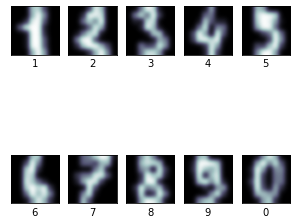

In [4]:
#Figura principal do plot
fig = plt.figure(figsize=(5,5))
 
#Plota cada uma das imagens e seus respectivos rotulos
for x in range(1,11):
    fig.add_subplot(2,5,x,xticks=[],yticks=[])
    plt.imshow(imagens[x],cmap=plt.cm.bone,interpolation='gaussian')
    if x <= 9:
        plt.xlabel(str(x))
    else:
        plt.xlabel(str(0))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
#Separa conjunto de treino e teste, contendo 200 objetos para teste
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3)

In [23]:
#Cria o modelo induzido
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#Armazena as predições do algoritmo para calcularmos algumas métricas
from sklearn.metrics import accuracy_score
predictions_train = knn.predict(x_train)
print(digits.target_names)
#Calcula a acurácia do treino
accuracy_score(y_train,predictions_train)*100

[0 1 2 3 4 5 6 7 8 9]


100.0

In [25]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y_train,predictions_train)

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 127,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 129,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 126,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 132,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120]])

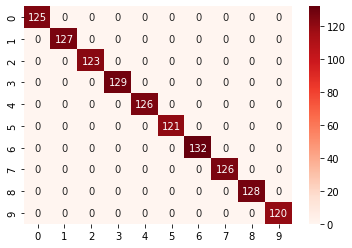

In [26]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y_train,predictions_train)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [27]:
#Calcula a acurácia para o conjunto de teste
predictions = knn.predict(x_test)
accuracy_score(y_test,predictions)*100

98.51851851851852

In [28]:
#Gera a matriz de confusão para o conjunto de teste
confusion_matrix(y_test,predictions)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 57]])

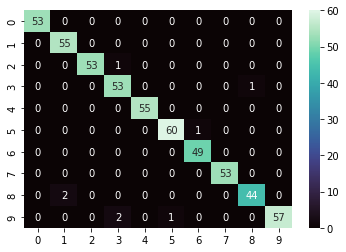

In [29]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="mako", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions,average='macro')*100

98.51330915054677

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        55
           2       1.00      0.98      0.99        54
           3       0.95      0.98      0.96        54
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        61
           6       0.98      1.00      0.99        49
           7       1.00      1.00      1.00        53
           8       0.98      0.96      0.97        46
           9       1.00      0.95      0.97        60

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

